Ejercicio de Regresion logistica

In [75]:
print ("Regresion Lineal Jaiver Barco")
print ("Analisis de Datos")


Regresion Lineal Jaiver Barco
Analisis de Datos


Exporto librerias

In [5]:
#cargar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#librerias ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression regresion 
from sklearn.metrics import classification_report, confusion_matrix

Exporto el archivo llamado modelo el cual contiene el modelo para la regresion

In [23]:
#cargue de datos
Datos=pd.read_csv('./modelo.csv')
# regresion lineal  Datos2=pd.read_csv('./Carv32.csv')


Listo los titulos los cuales previamente cambie a español

In [123]:
# regresion lineal Datos2.head()
Datos.head(100)

,Edad,sexo,Tipo_dolorP,PresionArterial,colesterol,AzucarSangre,ResultadosElectro,FrecuenciaC,AnginaInd,Depresion,Pendiente,NVasos,EstadoCorazon,Condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
96,59,1,2,126,218,1,0,134,0,2.2,1,1,1,1
97,59,1,2,150,212,1,0,157,0,1.6,0,0,0,0
98,58,1,2,112,230,0,2,165,0,2.5,1,1,2,1


In [31]:
Datos.describe()
# regresion lineal Datos2.describe()

,Edad,sexo,Tipo_dolorP,PresionArterial,colesterol,AzucarSangre,ResultadosElectro,FrecuenciaC,AnginaInd,Depresion,Pendiente,NVasos,EstadoCorazon,Condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Datos Atipicos Pendiente')

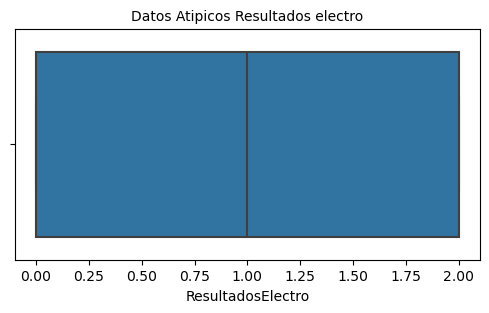

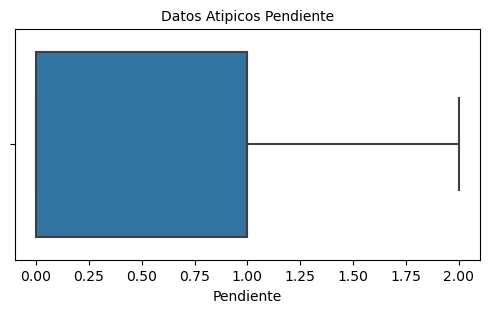

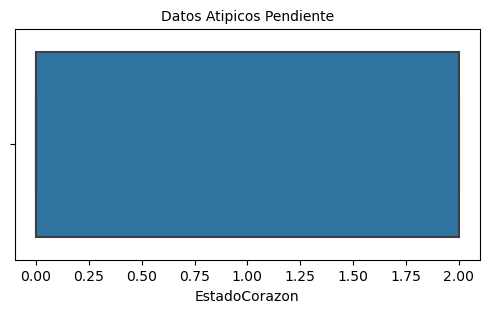

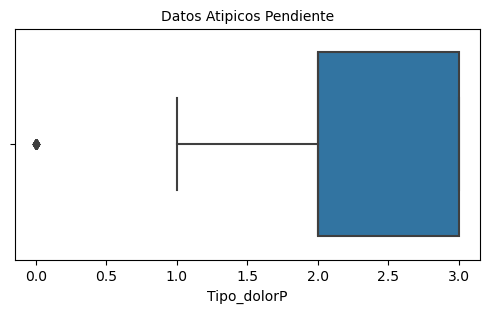

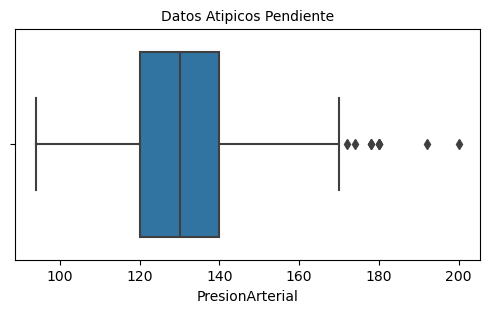

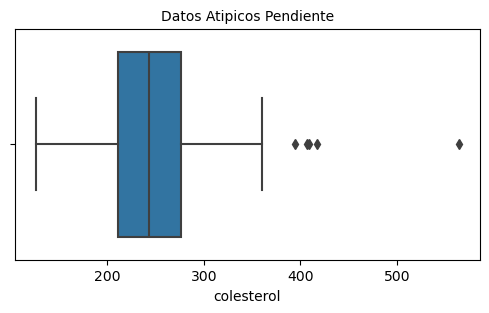

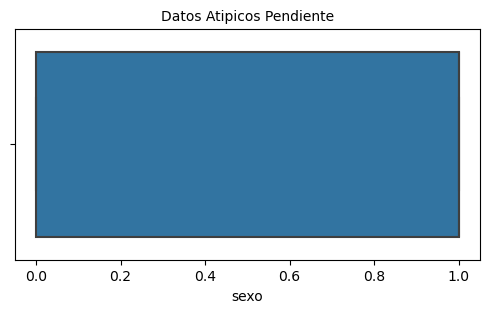

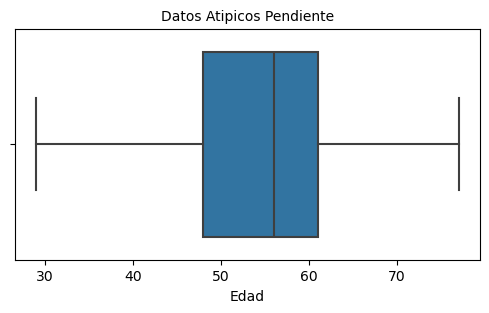

In [66]:
# Identificacion datos faltantes
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['ResultadosElectro'])
plt.title('Datos Atipicos Resultados electro',fontsize=10 )
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Pendiente'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['EstadoCorazon'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Tipo_dolorP'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['PresionArterial'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['colesterol'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['sexo'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Edad'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )

busco datos con valores cero, para este ejercicio se tienen valores con cero en la mayoria de variables, los cuales son permitidos, pues son tipo booleanos


In [52]:
print("Registros con cero en Edad",Datos['Edad'].isin([0]).sum() )
print("Registros con cero en sexo",Datos['sexo'].isin([0]).sum() )
print("Registros con cero en Presion Arterial",Datos['PresionArterial'].isin([0]).sum() )
print("Registros con cero en Colesterol",Datos['colesterol'].isin([0]).sum() )
print("Registros con cero en Nivel azucar en sangre",Datos['AzucarSangre'].isin([0]).sum() )
print("Registros con cero en Resultado Electrocardiograma",Datos['ResultadosElectro'].isin([0]).sum() )

print("Registros con cero en Frecuencia Cardiaca",Datos['FrecuenciaC'].isin([0]).sum() )
print("Registros con cero en Angida identificacion",Datos['AnginaInd'].isin([0]).sum() )
print("Registros con cero en depresion",Datos['Depresion'].isin([0]).sum() )
print("Registros con cero en Pendiente",Datos['Pendiente'].isin([0]).sum() )
print("Registros con cero en Condicion",Datos['Condicion'].isin([0]).sum() )
print("Registros con cero en Numero de Vasos",Datos['NVasos'].isin([0]).sum() )
print("Registros con cero en Estado Corazon",Datos['EstadoCorazon'].isin([0]).sum() )



Registros con cero en Edad 0
Registros con cero en sexo 96
Registros con cero en Presion Arterial 0
Registros con cero en Colesterol 0
Registros con cero en Nivel azucar en sangre 254
Registros con cero en Resultado Electrocardiograma 147
Registros con cero en Frecuencia Cardiaca 0
Registros con cero en Angida identificacion 200
Registros con cero en depresion 96
Registros con cero en Pendiente 139
Registros con cero en COndicion 160
Registros con cero en Numero de Vasos 174
Registros con cero en Estado Corazon 164


**Para mirar el tipo de dato en cada una de las variables, aunque son de tipo entero estan definidos con valores 0-1**

In [77]:
import pandas as pd
Datos=pd.read_csv('./modelo.csv')

tipo_de_dato = Datos['Condicion'].dtype
print(f"El tipo de dato de la columna 'Condicion' es: {tipo_de_dato}")

tipo_de_dato = Datos['Edad'].dtype
print(f"El tipo de dato de la columna 'Edad' es: {tipo_de_dato}")

tipo_de_dato = Datos['sexo'].dtype
print(f"El tipo de dato de la columna 'sexo' es: {tipo_de_dato}")

tipo_de_dato = Datos['PresionArterial'].dtype
print(f"El tipo de dato de la columna 'PresionArterial' es: {tipo_de_dato}")

tipo_de_dato = Datos['colesterol'].dtype
print(f"El tipo de dato de la columna 'colesterol' es: {tipo_de_dato}")

tipo_de_dato = Datos['AzucarSangre'].dtype
print(f"El tipo de dato de la columna 'AzucarSangre' es: {tipo_de_dato}")

tipo_de_dato = Datos['ResultadosElectro'].dtype
print(f"El tipo de dato de la columna 'ResultadosElectro' es: {tipo_de_dato}")

El tipo de dato de la columna 'Condicion' es: int64
El tipo de dato de la columna 'Edad' es: int64
El tipo de dato de la columna 'sexo' es: int64
El tipo de dato de la columna 'PresionArterial' es: int64
El tipo de dato de la columna 'colesterol' es: int64
El tipo de dato de la columna 'AzucarSangre' es: int64
El tipo de dato de la columna 'ResultadosElectro' es: int64


**Busco valores atipicos, se observo uno en colesterol superior a 500 por lo cual se modifica**

Text(0.5, 1.0, 'Datos Atipicos Pendiente')

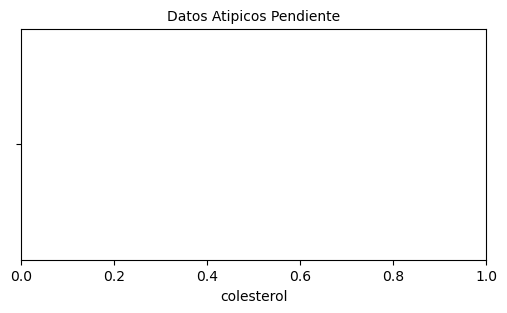

In [72]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['colesterol'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )

In [68]:
nivel_min=0
nivel_max=450
Total_atipicos=((Datos['colesterol']<nivel_min)|(Datos['colesterol']>nivel_max)).sum()
print("El total de Datos Atipicos es:{}".format(Total_atipicos))

El total de Datos Atipicos es:1


In [69]:
Datos=Datos[(Datos['colesterol']<nivel_min)&(Datos['colesterol']>nivel_max)]

In [70]:
Total_atipicos=((Datos['colesterol']<nivel_min)|(Datos['colesterol']>nivel_max)).sum()
print("El total de Datos Atipicos es:{}".format(Total_atipicos))

El total de Datos Atipicos es:0


Text(0.5, 1.0, 'Datos Atipicos Pendiente')

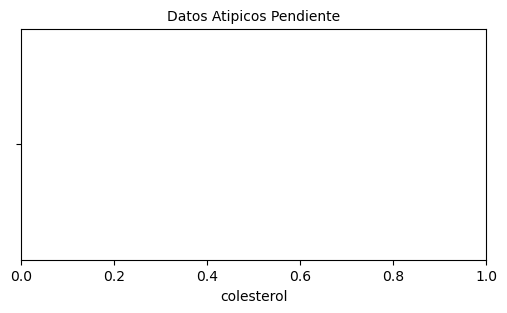

In [71]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['colesterol'])
plt.title('Datos Atipicos Pendiente',fontsize=10 )

In [74]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Edad               0 non-null      int64  
 1   sexo               0 non-null      int64  
 2   Tipo_dolorP        0 non-null      int64  
 3   PresionArterial    0 non-null      int64  
 4   colesterol         0 non-null      int64  
 5   AzucarSangre       0 non-null      int64  
 6   ResultadosElectro  0 non-null      int64  
 7   FrecuenciaC        0 non-null      int64  
 8   AnginaInd          0 non-null      int64  
 9   Depresion          0 non-null      float64
 10  Pendiente          0 non-null      int64  
 11  NVasos             0 non-null      int64  
 12  EstadoCorazon      0 non-null      int64  
 13  Condicion          0 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 0.0 bytes


In [85]:
Datos['EstadoCorazon'].value_counts()
Datos['AzucarSangre'].value_counts()
Datos['Condicion'].value_counts()


Condicion
0    160
1    137
Name: count, dtype: int64

**Dividir dataset y Data train para evaluar el Modelo**

In [92]:
#se Utiliza el 75% para train y 25% para prueba
x=Datos.drop('Condicion',axis=1)
y=Datos['Condicion']
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y, random_state=0)

In [93]:
print(x_train)

     Edad  sexo  Tipo_dolorP  PresionArterial  colesterol  AzucarSangre  \
234    56     0            3              200         288             1   
82     66     0            2              146         278             0   
36     56     1            1              120         240             0   
237    56     1            3              132         184             0   
133    47     1            2              108         243             0   
..    ...   ...          ...              ...         ...           ...   
291    40     1            3              110         167             0   
195    61     0            3              130         330             0   
170    65     0            3              150         225             0   
135    46     0            2              142         177             0   
293    39     1            3              118         219             0   

     ResultadosElectro  FrecuenciaC  AnginaInd  Depresion  Pendiente  NVasos  \
234                

In [94]:
print(y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: Condicion, Length: 222, dtype: int64


**Entrenar el modelo configurando parametros**

In [99]:
#basicamente se exporta una libreria
modelo_regresion= LogisticRegression(solver="liblinear")
#modelo_regresion= LinearRegression(solver="liblinear")
modelo_regresion.fit(x_train, y_train)

#se crea el modelo de prediccion
Prediccion= modelo_regresion.predict(x_test)


In [97]:
print(y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: Condicion, Length: 75, dtype: int64


In [100]:
print(Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


**EvaluarDesempeño modelo**

In [102]:
print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



**<h1> Matriz de Confusion</h1>**

Matriz de Confusión:
[[36  4]
 [ 5 30]]


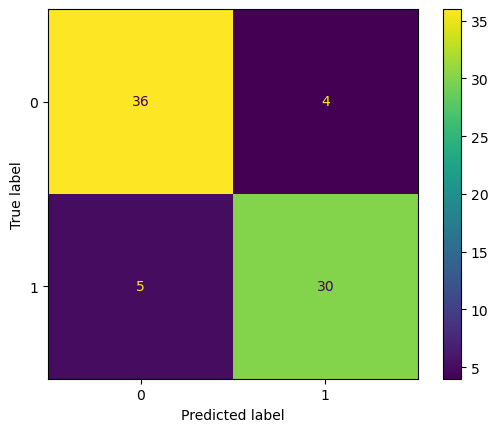

In [117]:
#matriz de Confusion
cm=confusion_matrix(y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print("Matriz de Confusión:")
print(cm)

**<h1> curva de Precision del Modelo**

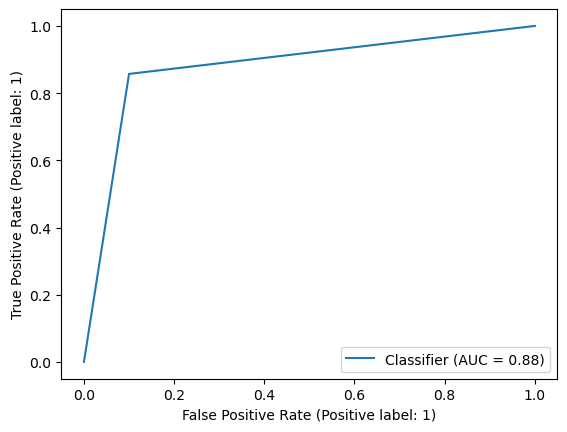

In [118]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()

In [121]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, Prediccion)


**<h1> Curva de Precision Recall**

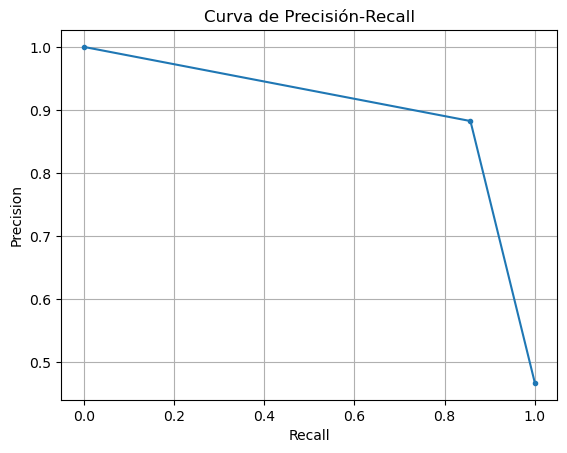

In [122]:
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.grid(True)
plt.show()

**Analisis**

<h1>Buen rendimiento general: Una precisión de 0.88 es bastante alta, lo que sugiere que el modelo está haciendo un buen trabajo en la clasificación de ambas clases.

Equilibrio entre clases: Dado que la precisión es similar para ambas clases, podría indicar que el modelo está equilibrado en su capacidad para predecir tanto la clase positiva como la clase negativa.

Desempeño consistente: La consistencia en la precisión entre las dos clases sugiere que el modelo no tiene un sesgo significativo hacia ninguna clase en particular.

Aunque una precisión del 0.88 es alta, aún es importante considerar otras métricas de evaluación del modelo, como el recall, la F1-score, la matriz de confusión, la curva ROC y la AUC-ROC, para obtener una imagen más completa del rendimiento del modelo y para identificar posibles áreas de mejora.
</h1>